In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [2]:
f = open('/Additional_experiments/Appendix_D/uncertainty_results/cal_metrics_bpe.json')

data = json.load(f)

f.close()

In [3]:
data.keys()

dict_keys(['ECE_human_maj_truth', 'TVD_per_instance', 'KL_Divergenece_per_instance', 'Entropy_difference_per_instance'])

In [4]:
data['ECE_human_maj_truth']

{'model_human': 0.14131043315735123,
 'oracle_dis_1_human': 0.500409376362819,
 'oracle_dis_2_human': 0.3957682820830729,
 'oracle_boot_1_human': 0.14452921395624355,
 'oracle_boot_2_human': 0.5571269064942035}

### Total Variation Distance

In [8]:
data['TVD_per_instance'].keys()

dict_keys(['tvd_model_human', 'tvd_oracle_dis_1_human', 'tvd_oracle_dis_2_human', 'tvd_oracle_boot_1_human', 'tvd_oracle_boot_2_human'])

In [5]:
def get_metrics(list_metric):
    array_metric = np.array(list_metric)
    return np.mean(array_metric), np.std(array_metric), np.min(array_metric), np.max(array_metric)

In [6]:
print('TVD metrics (mean, st. dev., min, max)')
print('Model', get_metrics(data['TVD_per_instance']['tvd_model_human']))
print('Oracles (disjoint)', get_metrics(data['TVD_per_instance']['tvd_oracle_dis_1_human']), get_metrics(data['TVD_per_instance']['tvd_oracle_dis_2_human']))
print('Oracles (bootstrapped)', get_metrics(data['TVD_per_instance']['tvd_oracle_boot_1_human']),  get_metrics(data['TVD_per_instance']['tvd_oracle_boot_2_human']))

TVD metrics (mean, st. dev., min, max)
Model (0.6569717972437811, 0.21796164580740215, 0.0022540665231645107, 0.9999948740005493)
Oracles (disjoint) (0.20733860837157703, 0.09231948302897017, 0.0, 0.5128205418586731) (0.21156800632646836, 0.09469838728744055, 0.0, 0.5)
Oracles (bootstrapped) (0.3310991754116935, 0.13596601634204508, 0.0, 0.6500000357627869) (0.26708852749208356, 0.12936689036209612, 0.0, 0.5928571820259094)


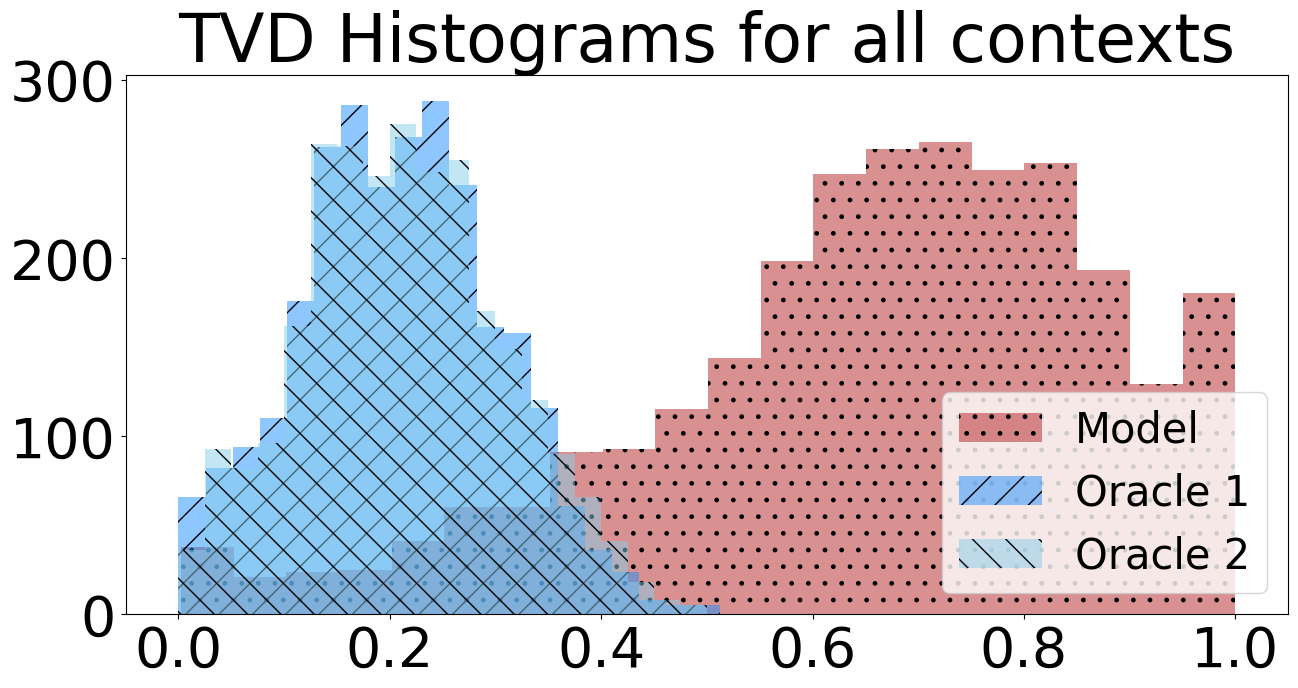

In [11]:
plt.rc('font', size=40)# controls default text sizes
plt.subplots(figsize=(15, 7))

plt.hist(data['TVD_per_instance']['tvd_model_human'], bins=20, alpha=0.5, label='Model', color='firebrick', hatch='.')
plt.hist(data['TVD_per_instance']['tvd_oracle_dis_1_human'], bins=20, alpha=0.5, label='Oracle 1', color='dodgerblue', hatch='/')
plt.hist(data['TVD_per_instance']['tvd_oracle_dis_2_human'], bins=20, alpha=0.5, label='Oracle 2', color='Skyblue', hatch='\\')

plt.title("TVD Histograms for all contexts")
plt.legend(loc='lower right',  prop={'size': 30})

plt.savefig('model_oracles_TVDs_BPES.pdf', format="pdf",bbox_inches='tight')
plt.show()